<center>
<h1><b>Mario Ferreyra | Emiliano Kokic</b></h1>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# **Laboratorio 1: Exploracion de datos**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from collections import OrderedDict
from IPython.display import display

In [2]:
sns.set_style("whitegrid")
responses = pd.read_csv('./Dataset/responses.csv')
#columns = pd.read_csv('./Dataset/columns.csv')

In [3]:
responses.shape

(1010, 150)

In [4]:
responses.dropna().shape

(674, 150)

No aplicamos `dropna()` sobre todo el DataFrame, sino directamente sobre cada columna.  
De esta manera evitamos mucha perdida de informacion al eliminar filas y columna que posiblemente tengas pocos `NaN`.

In [5]:
#responses = responses.dropna()
#pd.set_option('display.max_columns', 150)
responses[:5]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [6]:
responses.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


## **Estadísticas descriptivas**

#### Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad.

In [7]:
weight = responses.Weight.dropna()
age = responses.Age.dropna()

mode = [weight.mode().values[0], age.mode().values[0]]
mean = [weight.mean(), age.mean()]
median = [weight.median(), age.median()]
std = [weight.std(), age.std()]
minimum = [weight.min(), age.min()]
maximum = [weight.max(), age.max()]

d = OrderedDict()
d['Moda'] = mode
d['Media'] = mean
d['Mediana'] = median
d['Desviacion estandar'] = std
d['Minimo'] = minimum
d['Maximo'] = maximum

df = pd.DataFrame(data=d, index=['Peso', 'Edad'])
df

,Moda,Media,Mediana,Desviacion estandar,Minimo,Maximo
Peso,60.0,66.405051,64.0,13.839561,41.0,165.0
Edad,19.0,20.433699,20.0,2.828840,15.0,30.0


#### ¿Responden a alguna distribución conocida?

#### Notar que la media, la mediana y la moda practicamente coinciden, caracteristica que se ve presente en la distribucion normal.

/home/mferreyra/.virtualenvs/diplodatos-ayv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

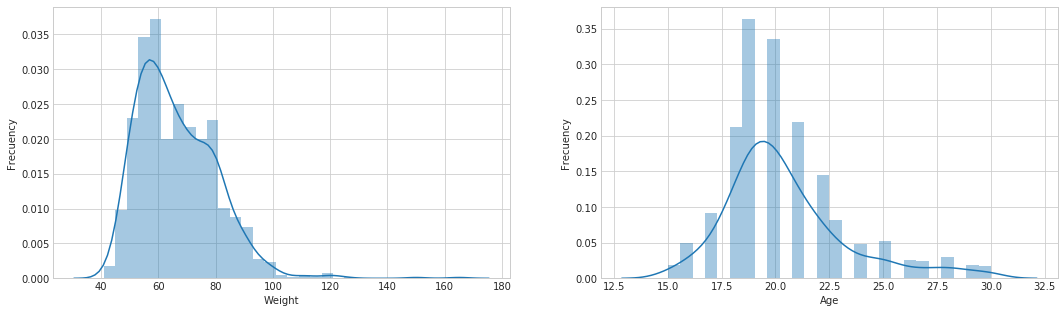

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

ax_w = sns.distplot(weight, norm_hist=True, ax=ax[0])
ax_w.set_xlabel("Weight")
ax_w.set_ylabel("Frecuency")
ax_w.plot()

ax_a = sns.distplot(age, norm_hist=True, ax=ax[1])
ax_a.set_xlabel("Age")
ax_a.set_ylabel("Frecuency")
ax_a.plot()

#### Realizar un análisis de outliers.

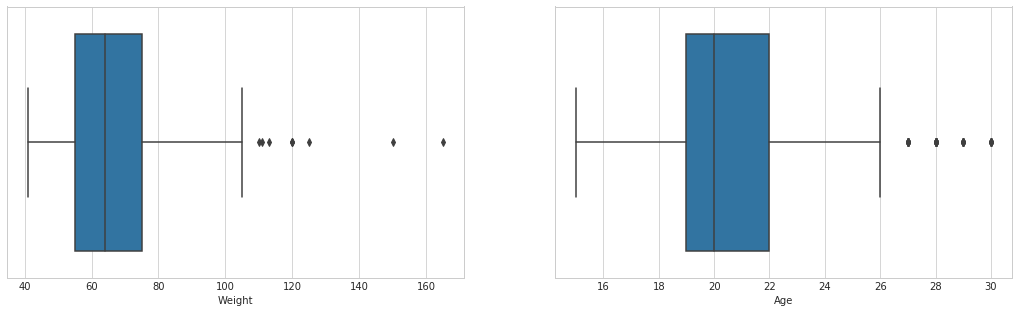

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.boxplot(x=weight, ax=ax[0])
sns.boxplot(x=age, ax=ax[1])

In [10]:
display('Cantidad outliers (peso): {}'.format(weight.loc[weight >= 110].shape[0]),
        'Cantidad total (peso): {}'.format(weight.shape[0]),
        'Cantidad outliers (edad): {}'.format(age.loc[age >= 27].shape[0]),
        'Cantidad total (edad): {}'.format(age.shape[0]))

'Cantidad outliers (peso): 9'

'Cantidad total (peso): 990'

'Cantidad outliers (edad): 52'

'Cantidad total (edad): 1003'

En el caso del peso, podemos notar que presenta una baja cantidad de valores atipicos (outliers)
mientras que en el caso de la variable edad hay una cantidad mayor cantidad.

Para la variable peso, se consideran valores atipicos a aquellos que superan los 110 Kg aproximadamente.

Para la variable edad, los valores atipicos son aquellos que superan los 27 años aproximadamente.
Un resultado inmediato a destacar es que solo pocos jovenes (9) superan los 110 Kg.

Por otro lado, tambien notamos que la mayoria de los jovenes encuentados no superan los 26 años de edad.

#### Explicar cómo varían las métricas cuando desglosamos por género.

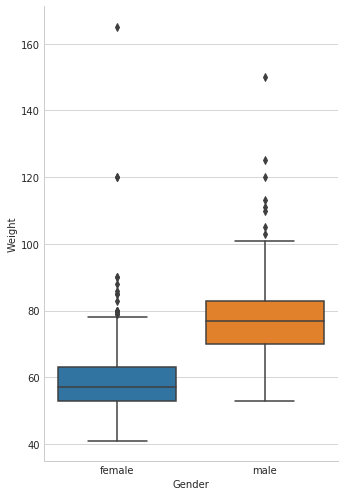

In [11]:
sns.factorplot(x="Gender", y="Weight", data=responses, kind="box", size=7, aspect=.7)

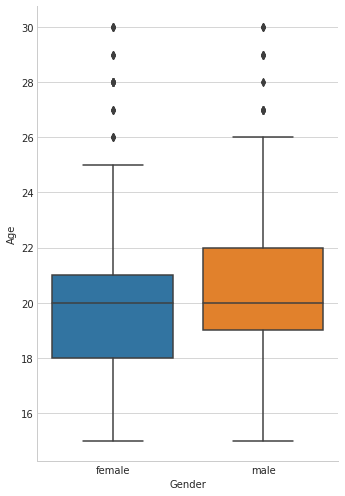

In [12]:
sns.factorplot(x="Gender", y="Age", data=responses, kind="box", size=7, aspect=.7)

#### ¿Responden a alguna distribución conocida?

/home/mferreyra/.virtualenvs/diplodatos-ayv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

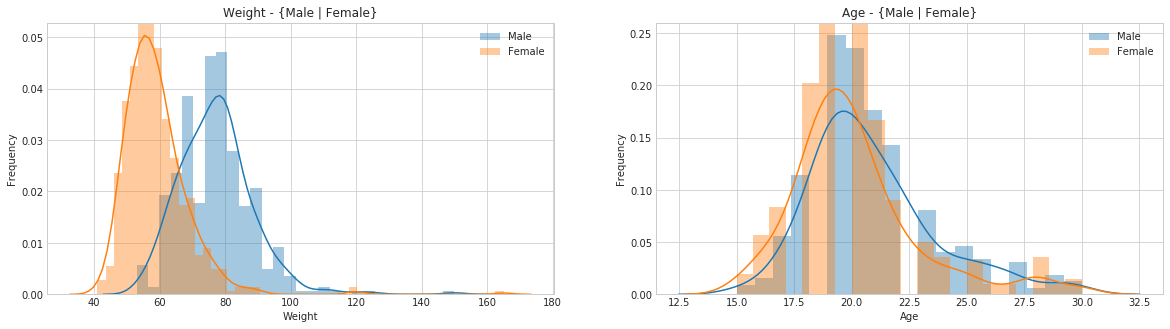

In [13]:
weight_gender = responses[["Weight", "Gender"]]
weight_gender = weight_gender.dropna()

weight_male = weight_gender[(weight_gender.Gender == "male")]
weight_male = weight_male.drop(columns=['Gender'])

weight_female = weight_gender[(weight_gender.Gender == "female")]
weight_female = weight_female.drop(columns=['Gender'])

# ============================================================= #

age_gender = responses[["Age", "Gender"]]
age_gender = age_gender.dropna()

age_male = age_gender[(age_gender.Gender == "male")]
age_male = age_male.drop(columns=['Gender'])

age_female = age_gender[(age_gender.Gender == "female")]
age_female = age_female.drop(columns=['Gender'])

# ============================================================= #

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1 = sns.distplot(weight_male, ax=ax[0], label="Male")
ax1.legend()
ax2 = sns.distplot(weight_female, ax=ax[0], label="Female")
ax2.legend()
ax2.set_title("Weight - {Male | Female}")
ax2.set_xlabel("Weight")
ax2.set_ylabel("Frequency")

ax3 = sns.distplot(age_male, ax=ax[1], label="Male")
ax3.legend()
ax4 = sns.distplot(age_female, ax=ax[1], label="Female")
ax4.legend()
ax4.set_title("Age - {Male | Female}")
ax4.set_xlabel("Age")
ax4.set_ylabel("Frequency")

Mirando los graficos, podemos determinar que responden a una Distribucion Normal.

* Comparar cualitativamente y gráficamente ambas distribuciones

Los graficos de ambas distribuciones son los graficados en la celda superior.

Respecto al grafico de distribucion del peso, se puede observar que las mujeres tienden a tener un peso menor al de los hombres en la mayoria de los casos.

Distinto es el caso de la distribucion de las edades de los hombres y mujeres, en el cual se asemejan.

#### Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.

In [14]:
weight_age_male = weight_male.join(age_male)
weight_age_female = weight_female.join(age_female)
#display(weight_age_female)
corr_male = weight_age_male.corr()
corr_female = weight_age_female.corr()
display('Male Correlation', corr_male)
display('Female Correlation', corr_female)

'Male Correlation'

,Weight,Age
Weight,1.000000,0.253514
Age,0.253514,1.000000


'Female Correlation'

,Weight,Age
Weight,1.000000,0.156477
Age,0.156477,1.000000


#### Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.

In [15]:
alcohol = responses.Alcohol.to_frame().dropna().describe()
smoking = responses.Smoking.to_frame().dropna().describe()
display(alcohol, smoking)

,Alcohol
count,1005
unique,3
top,social drinker
freq,659


,Smoking
count,1002
unique,4
top,tried smoking
freq,430


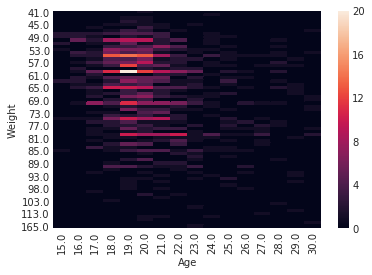

In [16]:
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
# https://relopezbriega.github.io/blog/2016/03/13/analisis-de-datos-cuantitativos-con-python/
weight_age_gender = responses[["Weight", "Age"]].dropna()
wa_croos = pd.crosstab(weight_age_gender.Weight, weight_age_gender.Age)
sns.heatmap(wa_croos)

In [17]:
print(responses.Alcohol.dropna().unique())
print(responses.Smoking.dropna().unique())

['drink a lot' 'social drinker' 'never']
['never smoked' 'tried smoking' 'former smoker' 'current smoker']


## Calculo de Probabilidad Conjunta 

Tomemos:
* A: toma valores en { 'never', 'drink a lot', 'social drinker' }
* B: toma valores en { 'never smoked', 'tried smoking', 'former smoker', 'current smoker' }

Asumimos los siguientes matcheos:
* 'never' = 'never smoked'
* 'drink a lot' = 'current smoker'

Luego: $P(A \cap B) = \frac{\#(A \cap B)}{\#S}$

donde S representa el espacio muestral.

$P(A \cap B) = \frac{2}{5}$

In [18]:
cross = pd.crosstab(index=responses.Alcohol.dropna(),
                    columns=responses.Smoking.dropna(),
                    margins=True,
                    normalize=True,
                    margins_name='marginal')

cross = cross.rename({'marginal': 'prob marginal de B'}, axis='index')
cross = cross.rename({'marginal': 'prob marginal de A'}, axis='columns')
cross

Smoking,current smoker,former smoker,never smoked,tried smoking,prob marginal de A
Alcohol,,,,,
drink a lot,0.078,0.055,0.015,0.072,0.220
never,0.011,0.011,0.061,0.039,0.122
social drinker,0.099,0.109,0.131,0.319,0.658
prob marginal de B,0.188,0.175,0.207,0.430,1.000


#### Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.

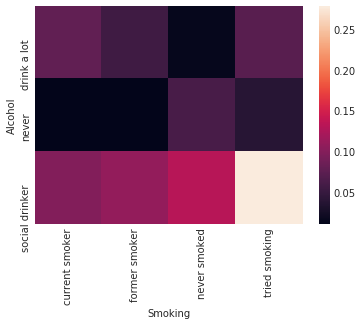

In [19]:
cross = pd.crosstab(index=responses.Alcohol.dropna(),
                    columns=responses.Smoking.dropna(),
                    normalize=True)

sns.heatmap(cross, robust=True)

In [20]:
alcohol_smoking = responses[["Alcohol", "Smoking"]]
display(alcohol_smoking.head(5))
new_table = pd.get_dummies(alcohol_smoking)
display(new_table[:5])
corr = new_table.corr()
corr

,Alcohol,Smoking
0,drink a lot,never smoked
1,drink a lot,never smoked
2,drink a lot,tried smoking
3,drink a lot,former smoker
4,social drinker,tried smoking


,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Smoking_current smoker,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking
0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1
3,1,0,0,0,1,0,0
4,0,0,1,0,0,0,1


,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Smoking_current smoker,Smoking_former smoker,Smoking_never smoked,Smoking_tried smoking
Alcohol_drink a lot,1.000000,-0.198567,-0.727281,0.223494,0.104451,-0.181622,-0.108869
Alcohol_never,-0.198567,1.000000,-0.512605,-0.094404,-0.083581,0.264579,-0.084154
Alcohol_social drinker,-0.727281,-0.512605,1.000000,-0.129642,-0.028475,-0.024242,0.161626
Smoking_current smoker,0.223494,-0.094404,-0.129642,1.000000,-0.219652,-0.244345,-0.413123
Smoking_former smoker,0.104451,-0.083581,-0.028475,-0.219652,1.000000,-0.233142,-0.394181
Smoking_never smoked,-0.181622,0.264579,-0.024242,-0.244345,-0.233142,1.000000,-0.438495
Smoking_tried smoking,-0.108869,-0.084154,0.161626,-0.413123,-0.394181,-0.438495,1.000000


Notar que las correlaciones directas que se presentan son:

    fumador actual - bebedor furioso
    ex fumador - bebedor furioso (que bebe mucho ;))
    nunca fumo - nunca bebio
    intento fumar - bebe solo cuando sale


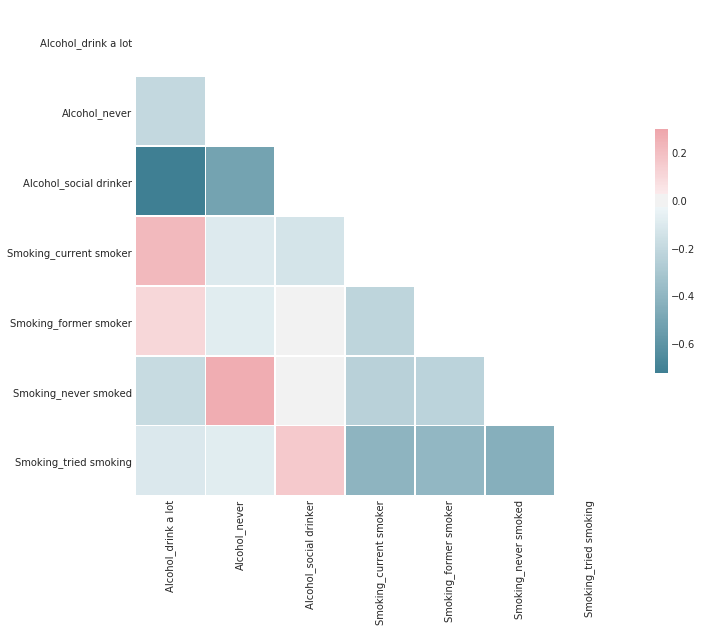

In [21]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#sns.heatmap(corr)

* ¿Que pasara con los niveles de tabaquismo si se prohibe fumar en los bares? 

Según nuestra percepción los niveles de consumo de tabaquismo pueden que no bajen tan notablemente ya que el fumador puede seguirlo haciendo en otro lugar.
Sin embargo, posiblemente si bajaría el consumo de alcohol en los bares ya que aquellos clientes fumadores posiblemente dejen de ir a los bares debido a la prohibición.

* ¿Que pasara con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

La cantidad de consumidores de alcohol disminuiría notablemente, ya que en la mayoría de los casos, aquellas personas que son fumadores activos coincide que también son grandes consumidores de alcohol.